# Data loading and explore

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
df.shape

(891, 15)

In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

## check duplicated

In [6]:
df.duplicated().sum()

107

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(784, 15)

## check nulls

In [9]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,106
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [10]:
import missingno as msn

<Axes: >

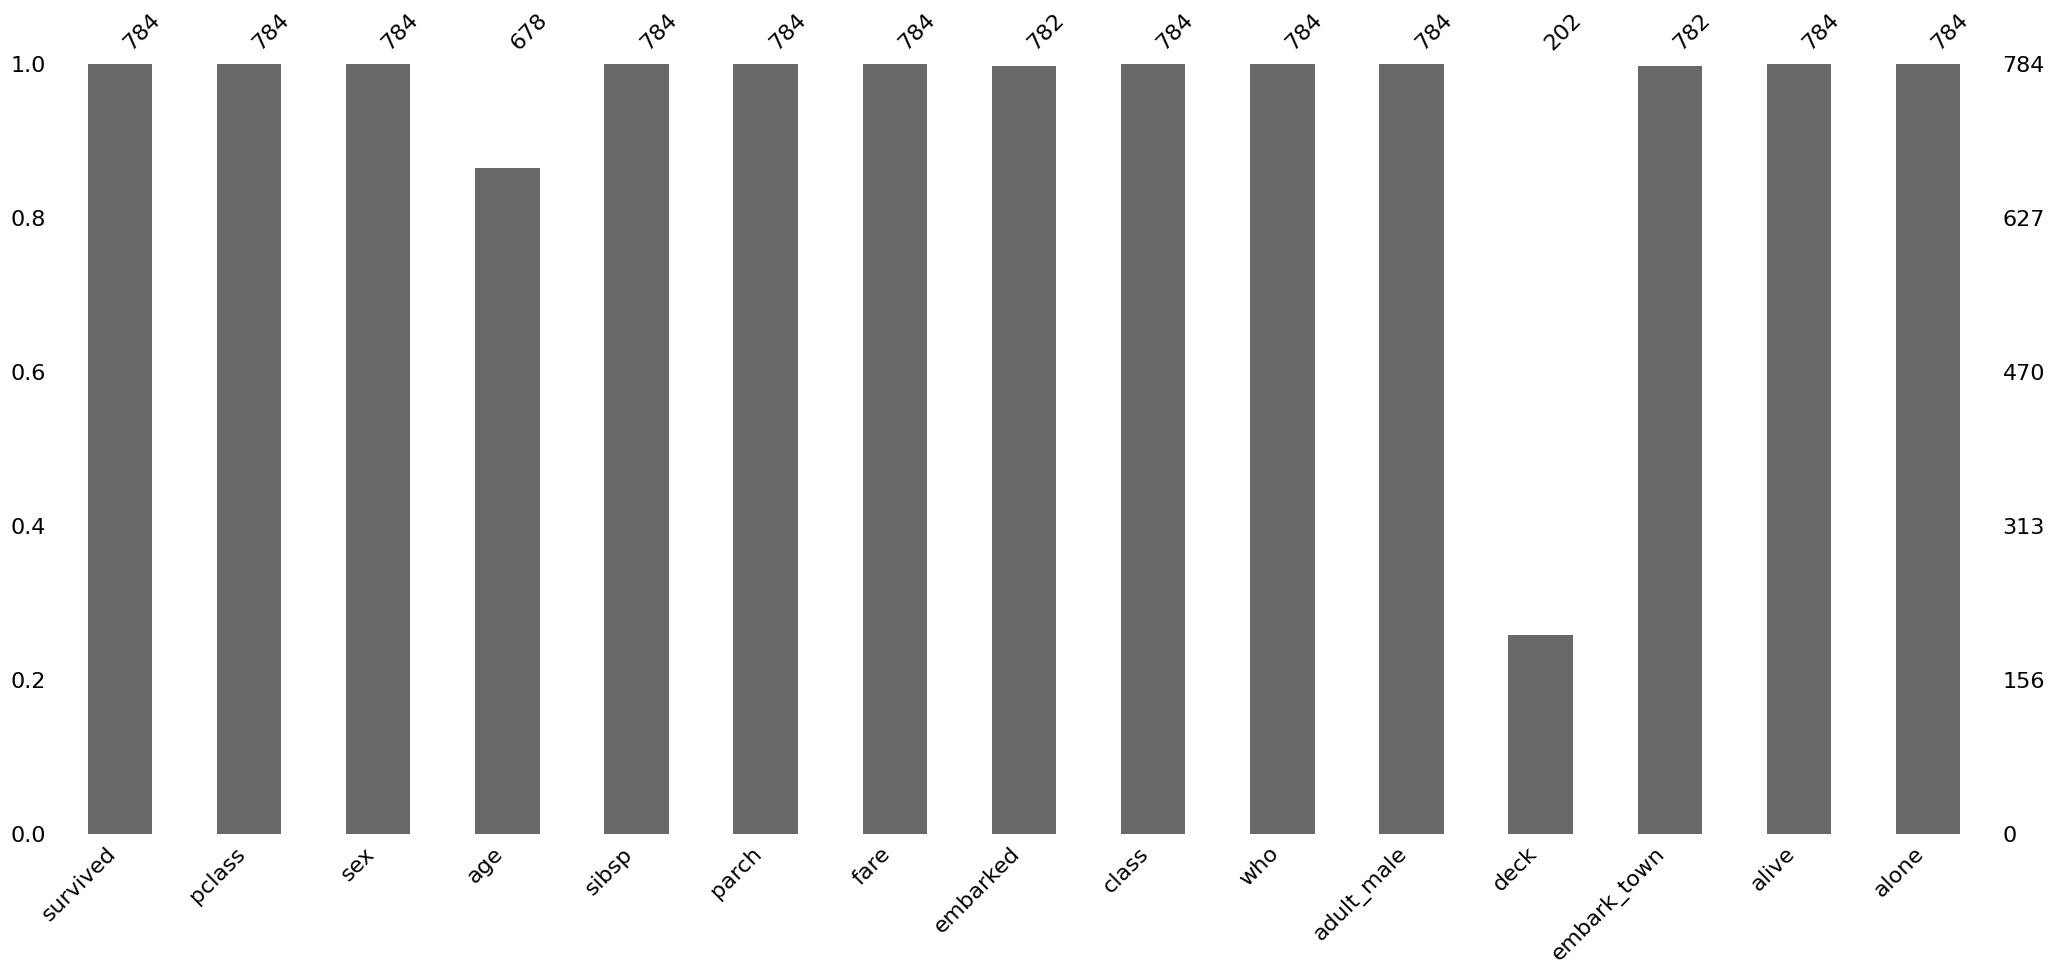

In [11]:
msn.bar(df)

## fill nulls

In [12]:
df = df.drop('deck', axis=1)

In [13]:
df['embarked'].value_counts()

,count
embarked,
S,568
C,155
Q,59


In [14]:
df['embarked'].fillna('S', inplace=True)

<ipython-input-14-69e5f3b604fb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna('S', inplace=True)


In [15]:
df['embark_town'].value_counts()# the same column

,count
embark_town,
Southampton,568
Cherbourg,155
Queenstown,59


In [16]:
df['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [17]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")

Number of outliers: 7


In [18]:
outliers['age'].value_counts()

,count
age,
71.0,2
70.0,2
70.5,1
80.0,1
74.0,1


In [19]:
df['age'].fillna(df['age'].median(), inplace=True)

<ipython-input-19-52ac7884633d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [20]:
df['age'] = df['age'].astype(int)

In [21]:
df['age'].unique()

array([22, 38, 26, 35, 28, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [22]:
df[df['age']==0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
78,1,2,male,0,0,2,29.0000,S,Second,child,False,Southampton,yes,False
305,1,1,male,0,1,2,151.5500,S,First,child,False,Southampton,yes,False
469,1,3,female,0,2,1,19.2583,C,Third,child,False,Cherbourg,yes,False
755,1,2,male,0,1,1,14.5000,S,Second,child,False,Southampton,yes,False
803,1,3,male,0,0,1,8.5167,C,Third,child,False,Cherbourg,yes,False
831,1,2,male,0,1,1,18.7500,S,Second,child,False,Southampton,yes,False


In [23]:
df['age'] = df['age'].replace(0, 1)

In [24]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [25]:
df = df.drop(['pclass','adult_male','embark_town','alive'], axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  784 non-null    int64  
 1   sex       784 non-null    object 
 2   age       784 non-null    int64  
 3   sibsp     784 non-null    int64  
 4   parch     784 non-null    int64  
 5   fare      784 non-null    float64
 6   embarked  784 non-null    object 
 7   class     784 non-null    object 
 8   who       784 non-null    object 
 9   alone     784 non-null    bool   
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 62.0+ KB


# Exploratory Data Analysis (EDA)

## distribution of data

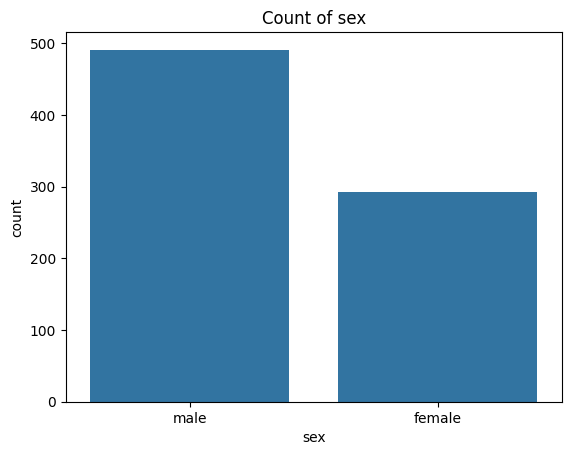

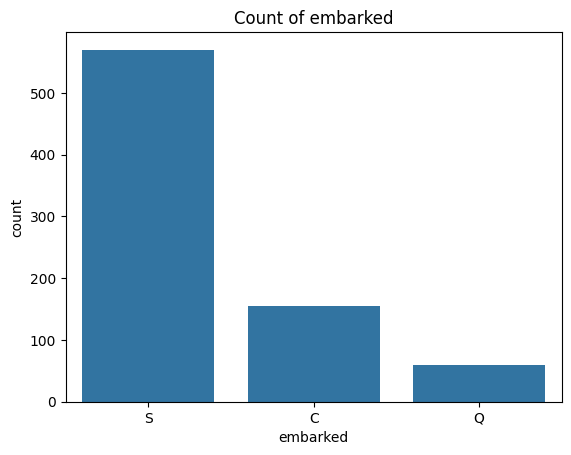

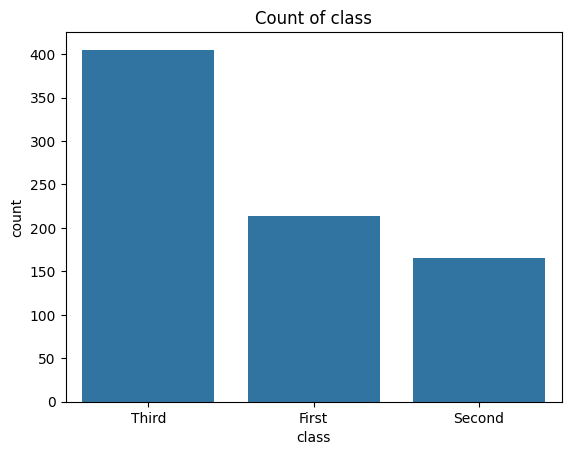

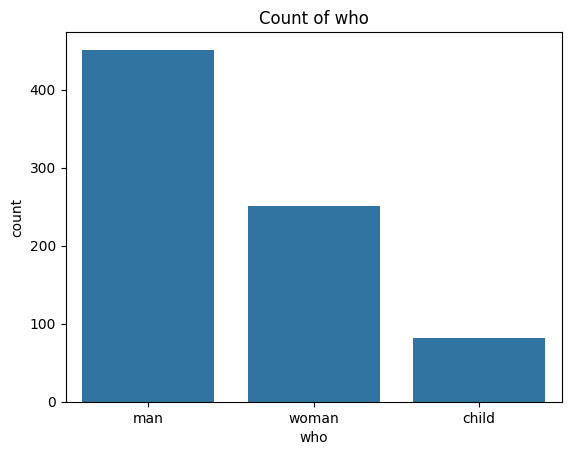

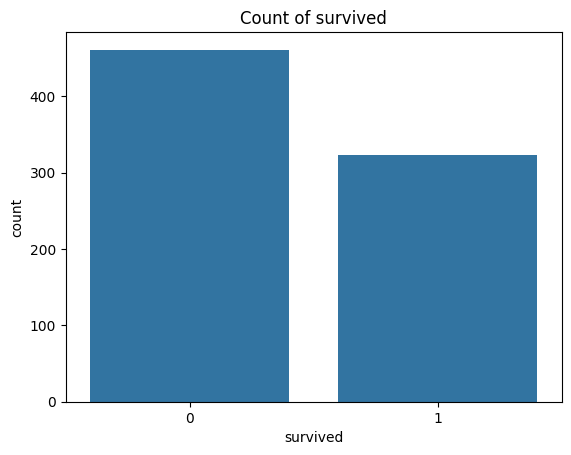

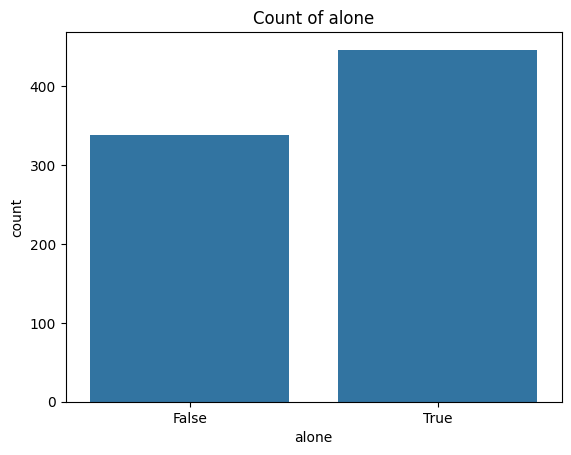

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count of categorical columns
for col in ['sex', 'embarked', 'class', 'who', 'survived', 'alone']:
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()

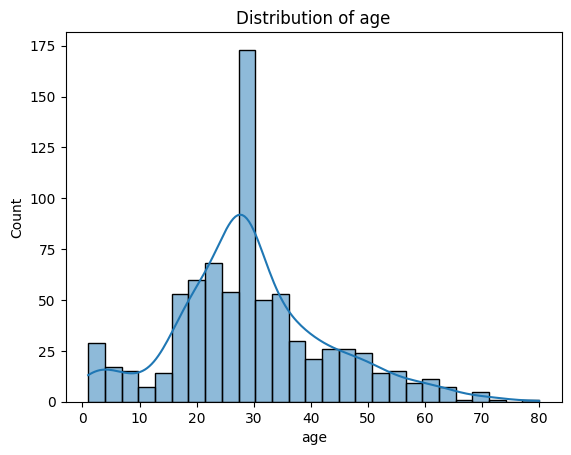

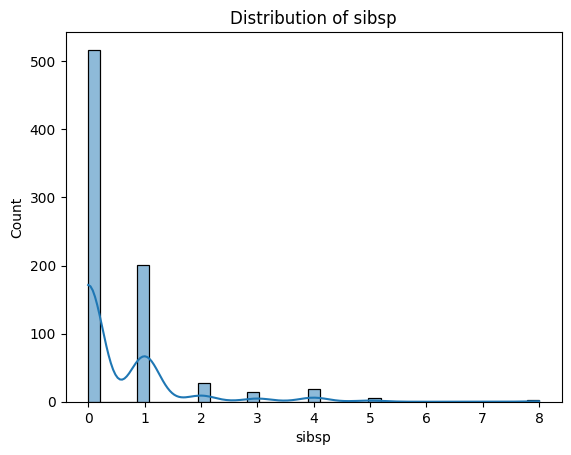

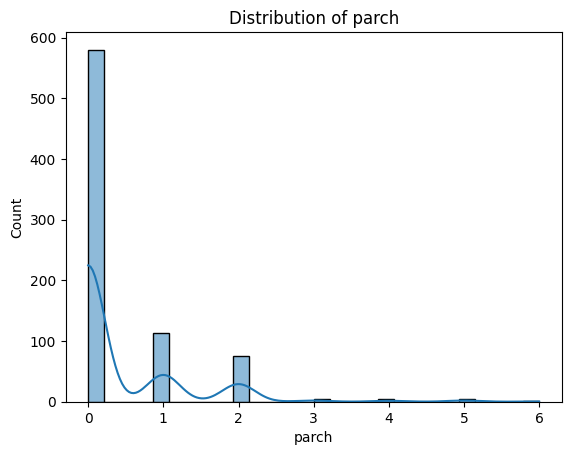

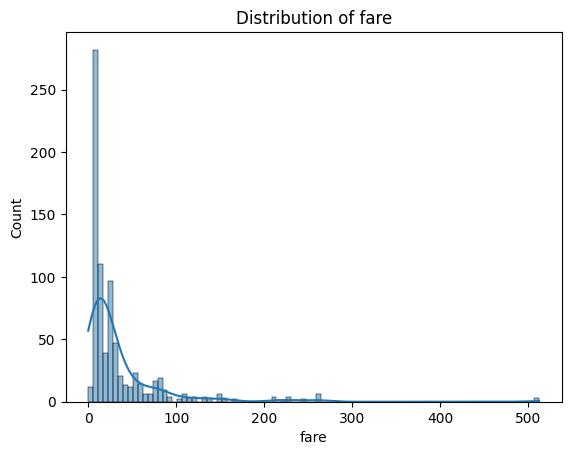

In [28]:
for col in ['age', 'sibsp', 'parch', 'fare']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## What is the overall survival rate?

Overall Survival Rate: 41.20%


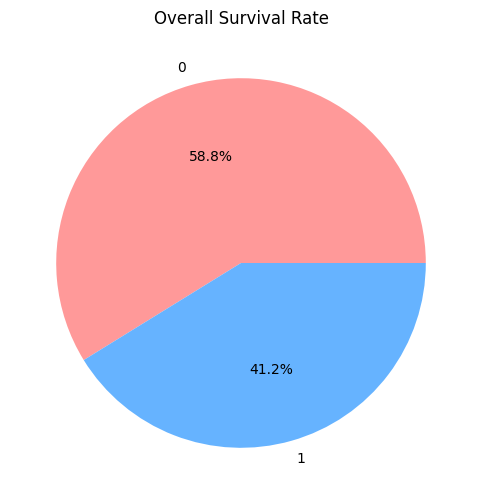

In [29]:
survival_rate = df['survived'].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")


plt.figure(figsize=(6, 6))
df['survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Overall Survival Rate')
plt.ylabel('')
plt.show()

## How does survival differ between males and females?

<ipython-input-30-3a5eee7630ad>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, ci=None)


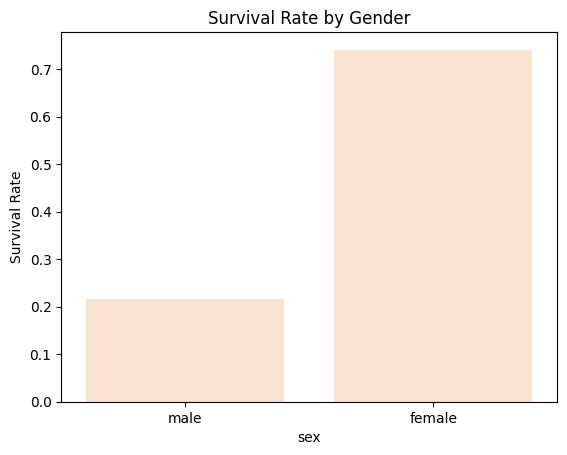

In [30]:
sns.set_palette("Oranges")
sns.barplot(x='sex', y='survived', data=df, ci=None)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

## Did higher-class passengers have a better chance of survival?

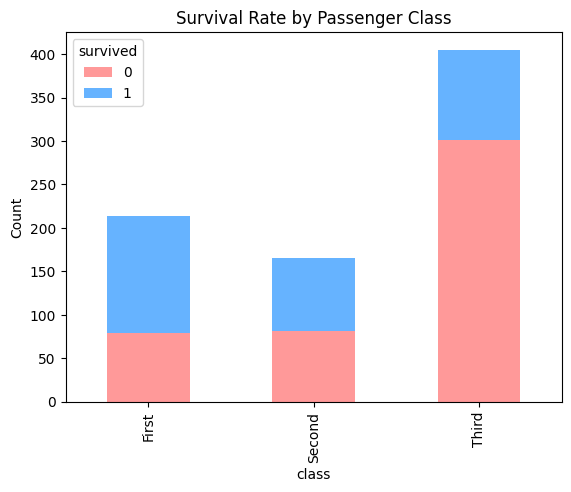

In [31]:
class_survival = df.groupby(['class', 'survived']).size().unstack()
class_survival.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Count')
plt.show()

## Did passengers traveling with family have a better chance of survival?

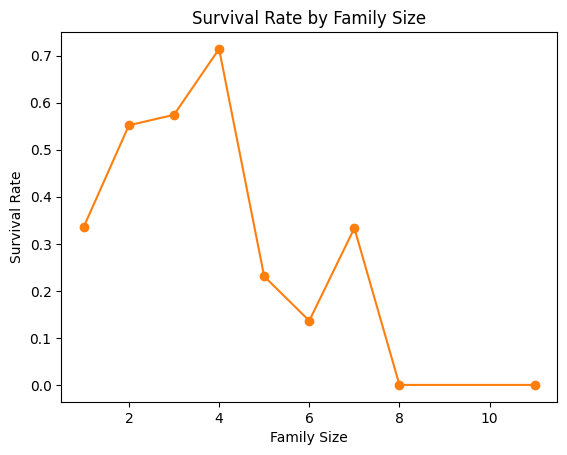

In [32]:
df['family_size'] = df['sibsp'] + df['parch'] + 1

family_survival = df.groupby('family_size')['survived'].mean()

plt.plot(family_survival.index, family_survival.values, marker='o', color='#ff7f0e')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

## Did the port of embarkation affect survival?

<ipython-input-33-7bfa179a1fce>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='embarked', y='survived', data=df, ci=None)


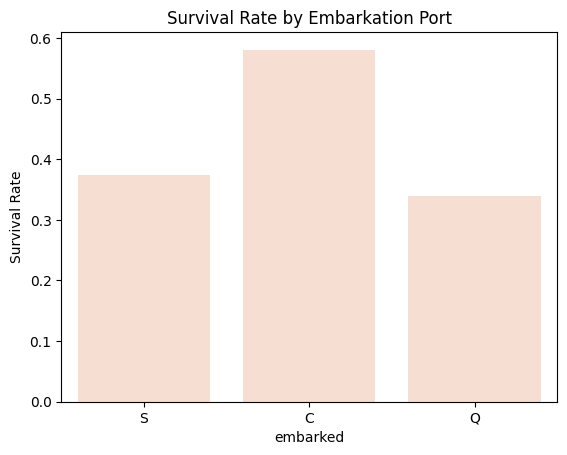

In [33]:
sns.set_palette("Reds")
sns.barplot(x='embarked', y='survived', data=df, ci=None)
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

## Did passengers traveling alone have a lower survival rate?

<ipython-input-34-b80b493a3851>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='alone', y='survived', data=df, ci=None)


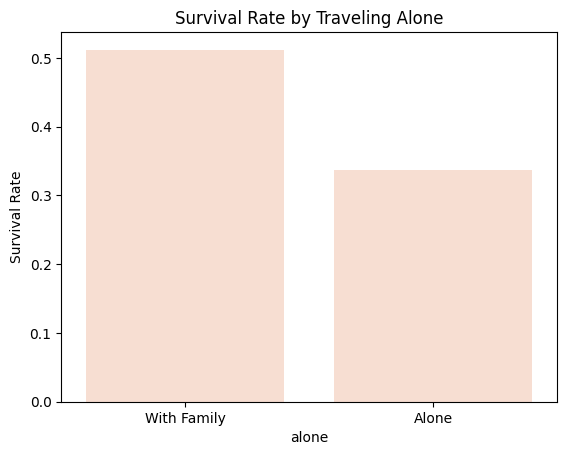

In [34]:
sns.set_palette("Reds")
sns.barplot(x='alone', y='survived', data=df, ci=None)
plt.title('Survival Rate by Traveling Alone')
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.ylabel('Survival Rate')
plt.show()

## How does survival rate vary by passenger type (man, woman, child)

<ipython-input-35-918ebb715b3b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='who', y='survived', data=df, ci=None)


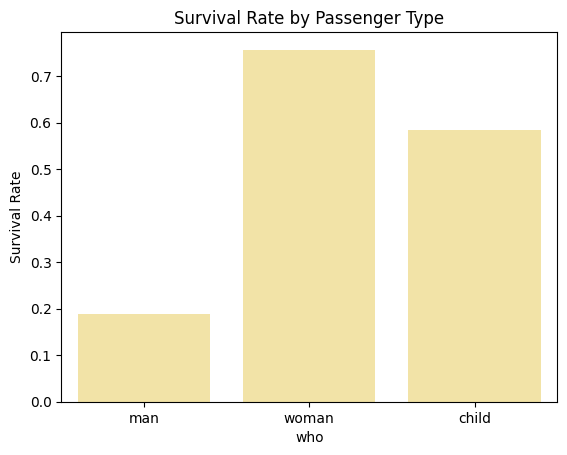

In [35]:
sns.set_palette("YlOrRd")
sns.barplot(x='who', y='survived', data=df, ci=None)
plt.title('Survival Rate by Passenger Type')
plt.ylabel('Survival Rate')
plt.show()

## How does survival rate vary by fare paid

<ipython-input-36-9f8c5692d75d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='survived', y='fare', data=df, ci=None)


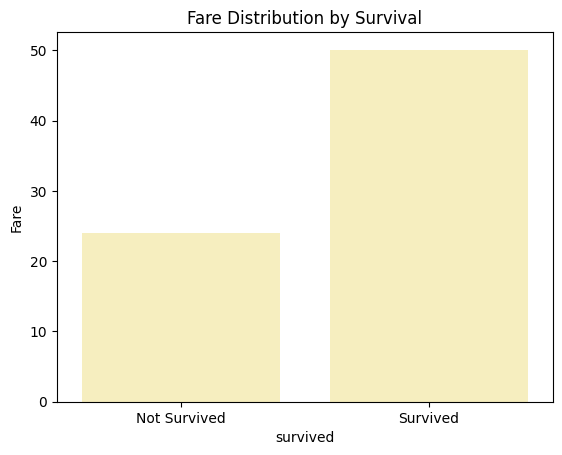

In [36]:
sns.set_palette("YlOrBr")
sns.barplot(x='survived', y='fare', data=df, ci=None)
plt.title('Fare Distribution by Survival')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.ylabel('Fare')
plt.show()

## Did children have a higher survival rate than adults?

<ipython-input-37-540df1287156>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='survived', data=df, ci=None)


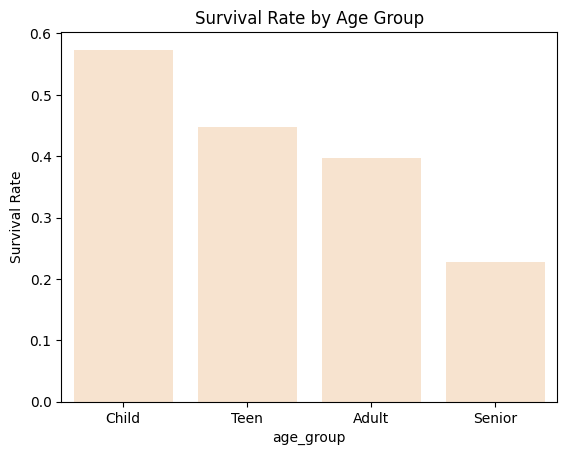

In [37]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teen', 'Adult', 'Senior'])

# Survival rate by age group
sns.set_palette("Oranges")
sns.barplot(x='age_group', y='survived', data=df, ci=None)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()

## Are there any strong correlations between numerical features?

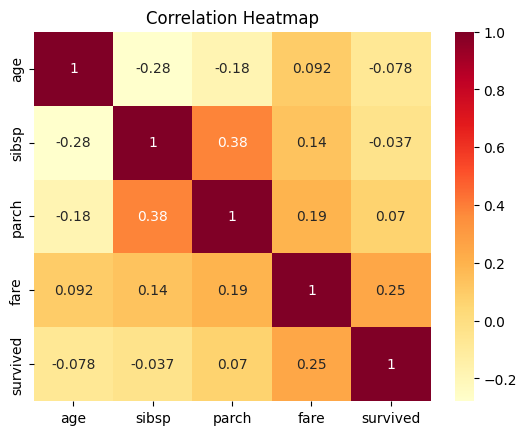

In [38]:
sns.set_palette("OrRd")
sns.heatmap(df[['age', 'sibsp', 'parch', 'fare', 'survived']].corr(), annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()